In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':.5,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Bonds'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]
symbols += ['BND', 'BNDX', 'BNDW', 'BIV', 'AGG']

In [2]:
quote = Quote(symbols, 70, 20)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-04-26 to 2019-07-05 - 70'

In [3]:
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 2) & (stat['mean'] > .8) & (stat['shrp'] > 1.6)]
print(len(stat))
stat

37


,len,mean,std,shrp,drawdown
Symbols,,,,,
BNDW,29,1.651389,0.335067,4.454804,0.290913
BNDX,29,1.640596,0.359783,4.118780,0.193599
BLV,29,3.695455,0.870521,4.062768,1.030194
BND,29,1.637856,0.398859,3.708395,0.468862
AGG,29,1.629818,0.408037,3.605279,0.421299
BIV,29,2.043719,0.523486,3.600838,0.576701
MBB,29,1.031416,0.251037,3.476328,0.325100
VMBS,29,0.917734,0.222086,3.417611,0.264901
VCIT,29,2.090997,0.651765,2.964667,0.533337


Populating the interactive namespace from numpy and matplotlib
evicted TIP 0.9981473615233287
evicted SCHP 0.9975225975709937
evicted SCHR 0.9973104097402274
evicted GOVT 0.9939757641441941
evicted TDTT 0.9095725375178867
evicted BSV 0.9570545684785854
evicted IEI 0.997655872611023
evicted TLT 0.9994836907705151
evicted BNDW 0.9256114207244915
evicted VGIT 0.9853893758702151
evicted SPIB 0.9828206809561281
evicted IGIB 0.9859947275265333
evicted IPE 0.9312471040588008
evicted VMBS 0.9506169857031342
evicted MBB 0.9485059523785302
evicted AGG 0.9906855647533929
evicted VCSH 0.9861409657081793
evicted SLQD 0.9767325193365737
evicted IGSB 0.9598854518745328
evicted VTEB 0.9774182164293596
evicted BLV 0.9197741578871145
evicted VCIT 0.9661959987520327
evicted BND 0.985570754935347
evicted BIV 0.9259246192643144
evicted USIG 0.9932357305834124
evicted SPTL 0.9390400380783853
evicted IEF 0.6853206509731486
evicted ISTB 0.7997657780037317
evicted ITM 0.9721142830128185
evicted VCLT 0.97684920

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,1.224848,0.137186,0.959026,1.144012,1.206195,1.307485,1.548923,7.771358,0.192887
BNDX,29.0,1.640596,0.359783,0.845117,1.566924,1.636476,1.870652,2.313707,4.118780,0.193599
HYD,29.0,0.899930,0.338565,0.246670,0.688399,0.801939,1.059072,1.668247,2.189243,0.409065
CMF,29.0,0.850245,0.331613,0.137041,0.647924,0.799189,1.101216,1.509809,2.085306,0.181783
EMB,29.0,2.423185,1.325130,0.071825,1.550858,2.679961,3.526421,4.472169,1.708856,1.290153
VWOB,29.0,2.277519,1.243898,0.134394,1.343368,2.406546,3.313306,4.082480,1.703346,0.872579


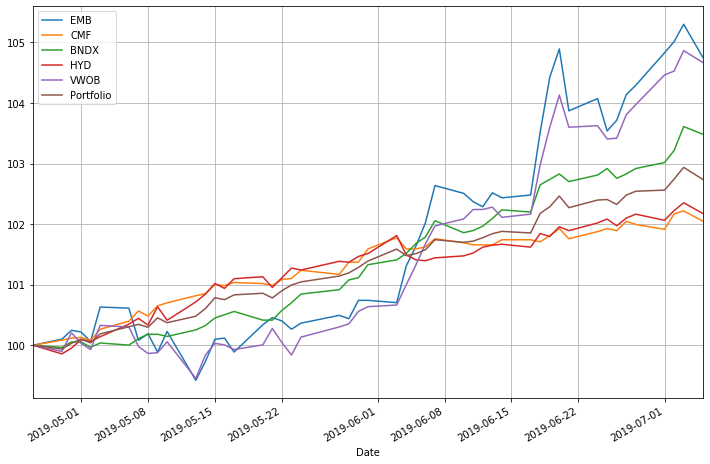

In [4]:
%pylab inline
quote.drop_mask()
ratio = quote.optimize_portfolio(stat.index)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)